In this section we will code the segmentation of the client

Importation des librairie : 

In [23]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

Importation des données

In [5]:
PATH="."
customer_segmentation = PATH+"/customer_segmentation.csv"

In [6]:
data_seg = pd.read_csv(customer_segmentation,sep=";",parse_dates=True)

In [185]:
data_seg.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,order_id,order_status,quantity_Item,basket_price,basket_freight_value
0,4546caea018ad8c692964e3382debd19,5882.0,sao paulo,SP,2017-07-16 18:19:25,8272b63d03f5f79c56e9e4120aec44ef,delivered,21,31.80,164.37
1,698e1cf81d01a3d389d96145f7fa6df8,74825.0,goiania,GO,2017-08-23 09:22:34,ab14fdcfbe524636d65ee38360e22ce8,delivered,20,1974.00,288.80
2,c402f431464c72e27330a67f7b94d4fb,3029.0,sao paulo,SP,2018-02-22 15:30:41,1b15974a0141d54e36626dca3fdc731a,delivered,20,2000.00,202.40
3,0f5ac8d5c31de21d2f25e24be15bbffb,84600.0,uniao da vitoria,PR,2017-11-23 20:30:52,428a2f660dc84138d969ccd69a0ab6d5,delivered,15,982.35,243.30
4,11f97da02237a49c8e783dfda6f50e8e,74885.0,goiania,GO,2017-01-30 21:44:49,9ef13efd6949e4573a18964dd1bbe7f5,delivered,15,765.00,18.00


In [8]:
data_seg.dtypes

customer_unique_id           object
customer_zip_code_prefix    float64
customer_city                object
customer_state               object
order_purchase_timestamp     object
order_id                     object
order_status                 object
quantity_Item                 int64
basket_price                float64
basket_freight_value        float64
dtype: object

In [9]:
#casting date column from object to date
data_seg['order_purchase_timestamp'] = pd.to_datetime(data_seg['order_purchase_timestamp'])
data_seg.dtypes

customer_unique_id                  object
customer_zip_code_prefix           float64
customer_city                       object
customer_state                      object
order_purchase_timestamp    datetime64[ns]
order_id                            object
order_status                        object
quantity_Item                        int64
basket_price                       float64
basket_freight_value               float64
dtype: object

In [10]:
#Creating a new columns with number of orders perusers, min orders purchase, max orders purchase, mean and sum orders purchase 
data_seg["all_basket"]= data_seg["basket_price"]+data_seg["basket_freight_value"]
Orders_per_users= data_seg.groupby(by=['customer_unique_id'])['all_basket'].agg(['count','min','max','mean','sum'])
Orders_per_users.reset_index(drop = False, inplace = True)
Orders_per_users.sort_values(by='count',ascending=[False]).head(10)

,customer_unique_id,count,min,max,mean,sum
52596,8d50f5eadf50201ccdcedfb9e2ac8455,16,21.77,166.71,56.377500,902.04
23302,3e43e6105506432c953e165fb2acf44c,9,65.10,364.18,130.296667,1172.67
75559,ca77025e7201e3b30c44b472ff346268,7,78.86,289.07,160.388571,1122.72
37531,6469f99c1f9dfae7733b25662e7f1782,7,32.65,253.08,108.404286,758.83
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7,52.15,267.16,137.001429,959.01
37319,63cfc61cee11cbe306bff5857d00bfe4,6,84.30,238.36,137.720000,826.32
82304,dc813062e0fc23409cd255f7f53c7074,6,99.03,336.60,172.270000,1033.62
7124,12f5d6e1cbf93dafd9dcc19095df0b3d,6,15.62,19.62,18.453333,110.72
89813,f0e310a6839dce9de1638e0fe5ab282a,6,43.09,243.34,90.115000,540.69
82959,de34b16117594161a6a89c50b289d35a,5,36.78,307.26,106.076000,530.38


In [14]:
#Casting order_purchase_timestamp to date 
#data_seg['order_purchase_timestamp'] = data_seg['order_purchase_timestamp'].date
#Creating recency columns : This column is to mesure how recent the purchase of each Customer
snopshot_date = data_seg['order_purchase_timestamp'].max().date()
snopshot_date

datetime.date(2018, 9, 3)

In [12]:
first_purchase = pd.DataFrame(data_seg.groupby(by=['customer_unique_id'])['order_purchase_timestamp'].min())
last_purchase  = pd.DataFrame(data_seg.groupby(by=['customer_unique_id'])['order_purchase_timestamp'].max())

In [16]:
first_purchase_reference  = first_purchase.applymap(lambda x:(snopshot_date - x.date()).days)
last_purchase_reference = last_purchase.applymap(lambda x:(snopshot_date - x.date()).days)
last_purchase_reference 

,order_purchase_timestamp
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,116
0000b849f77a49e4a4ce2b2a4ca5be3f,119
0000f46a3911fa3c0805444483337064,542
0000f6ccb0745a6a4b88665a16c9f078,326
0004aac84e0df4da2b147fca70cf8255,293
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452
fffea47cd6d3cc0a88bd621562a9d061,267
ffff371b4d645b6ecea244b27531430a,573


In [17]:
Orders_per_users.loc[:, 'Firstpurchase'] = first_purchase_reference.reset_index(drop = False)['order_purchase_timestamp']
Orders_per_users.loc[:, 'LastPurchase'] = last_purchase_reference.reset_index(drop = False)['order_purchase_timestamp']
Orders_per_users.sort_values(by=['count'],ascending=[False]).head(10)

,customer_unique_id,count,min,max,mean,sum,Firstpurchase,LastPurchase
52596,8d50f5eadf50201ccdcedfb9e2ac8455,16,21.77,166.71,56.377500,902.04,476,14
23302,3e43e6105506432c953e165fb2acf44c,9,65.10,364.18,130.296667,1172.67,350,188
75559,ca77025e7201e3b30c44b472ff346268,7,78.86,289.07,160.388571,1122.72,329,94
37531,6469f99c1f9dfae7733b25662e7f1782,7,32.65,253.08,108.404286,758.83,349,67
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7,52.15,267.16,137.001429,959.01,294,201
37319,63cfc61cee11cbe306bff5857d00bfe4,6,84.30,238.36,137.720000,826.32,480,98
82304,dc813062e0fc23409cd255f7f53c7074,6,99.03,336.60,172.270000,1033.62,429,11
7124,12f5d6e1cbf93dafd9dcc19095df0b3d,6,15.62,19.62,18.453333,110.72,606,606
89813,f0e310a6839dce9de1638e0fe5ab282a,6,43.09,243.34,90.115000,540.69,471,151
82959,de34b16117594161a6a89c50b289d35a,5,36.78,307.26,106.076000,530.38,304,229


In [18]:
#Manage skewness : 
print(Orders_per_users.skew())

count            12.320191
min               9.282873
max               9.156160
mean              9.253868
sum               9.088502
Firstpurchase     0.430562
LastPurchase      0.448743
dtype: float64


/var/folders/r7/s01drwz93kxgfqb5rcpz0zqh0000gn/T/ipykernel_95494/727909629.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Orders_per_users.skew())


count , mi, max, mean and sum are highly skewed so we have to apply transformation to have symmetrical shape

In [19]:
Orders_per_users["min"] = stats.boxcox(Orders_per_users['min'])[0]
Orders_per_users["max"] = stats.boxcox(Orders_per_users['max'])[0]
Orders_per_users["mean"] = stats.boxcox(Orders_per_users['mean'])[0]
Orders_per_users["sum"] = stats.boxcox(Orders_per_users['sum'])[0]

In [20]:
print(Orders_per_users.skew())

count            12.320191
min               0.005714
max               0.005180
mean              0.004844
sum               0.006477
Firstpurchase     0.430562
LastPurchase      0.448743
dtype: float64


/var/folders/r7/s01drwz93kxgfqb5rcpz0zqh0000gn/T/ipykernel_95494/176691582.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Orders_per_users.skew())


In [21]:
Orders_per_users

,customer_unique_id,count,min,max,mean,sum,Firstpurchase,LastPurchase
0,0000366f3b9a7992bf8c76cfdf3221e2,1,3.076447,3.108036,3.091658,3.125397,116,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2.380205,2.397553,2.388568,2.407052,119,119
2,0000f46a3911fa3c0805444483337064,1,2.891369,2.918591,2.904481,2.933536,542,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,2.604671,2.625990,2.614945,2.637677,326,326
4,0004aac84e0df4da2b147fca70cf8255,1,3.187956,3.222413,3.204544,3.241362,293,293
...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1,3.797877,3.851893,3.823841,3.881734,452,452
95415,fffea47cd6d3cc0a88bd621562a9d061,1,2.883839,2.910893,2.896871,2.925745,267,267
95416,ffff371b4d645b6ecea244b27531430a,1,2.992481,3.022031,3.006712,3.038263,573,573
95417,ffff5962728ec6157033ef9805bacc48,1,3.055316,3.086382,3.070275,3.103454,124,124


The mean is  of the sum/count so we can not use the count colum and the sum column

Normalizing data

In [35]:
# Import library
# Initialize the Object
Orders_per_users2 = Orders_per_users[["min","max","mean","Firstpurchase","LastPurchase"]]
scaler = StandardScaler()# Fit and Transform The Data
scaler.fit(Orders_per_users2)
customers_normalized = scaler.transform(Orders_per_users2)# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2))

[ 0.  0. -0. -0.  0.]
[1. 1. 1. 1. 1.]


In [36]:
customers_normalized 

array([[ 0.41312497,  0.38891632,  0.39892961, -0.84724251, -0.83246357],
       [-1.94271099, -1.96552848, -1.96575756, -0.82771841, -0.81287629],
       [-0.21311315, -0.23887988, -0.23059696,  1.92518022,  1.9489296 ],
       ...,
       [ 0.12901546,  0.10390742,  0.1132349 ,  2.12692929,  2.15133145],
       [ 0.34162454,  0.31715847,  0.32701519, -0.79517824, -0.78023083],
       [-0.46477001, -0.49073945, -0.48337001,  1.58025439,  1.60288773]])

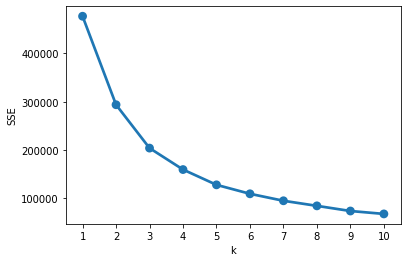

In [37]:
from sklearn.cluster import KMeans
Inertia = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    Inertia[k] = kmeans.inertia_ # SSE to closest cluster centroidplt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(Inertia.keys()), y=list(Inertia.values()))
plt.show()

We can choose the cutoff at 3 clusters

In [38]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(customers_normalized)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

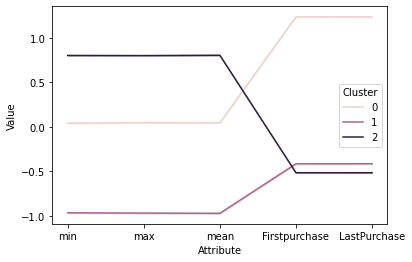

In [41]:
df_normalized = pd.DataFrame(customers_normalized, columns=["min","max","mean","Firstpurchase","LastPurchase"])
df_normalized['customer_unique_id'] = Orders_per_users['customer_unique_id']
df_normalized['Cluster'] = kmeans_model.labels_
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['customer_unique_id', 'Cluster'],
                      value_vars=["min","max","mean","Firstpurchase","LastPurchase"],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

Cluster2 is the cluster where customers spend money and return recently to buy a product ==> Loyal customer 

Cluster0 spend less money but they make their first and last purchase at an old time ==> Churn customer 

cluster1 spend few money and are making recent purchase ==> new customer